# 1 

A partir del fichero "US_Crime_Rates_1960_2014", se pide:

1. Tratar el dataset como una serie temporal a partir de la columna Year. Siempre el eje X será el nuevo índice Year.
2. Dibujar todas las columnas numéricas.
3. Como se puede ver en el punto 2, la columna "Population" tiene una magnitud diferente a la de las demás columnas: Dibuja la misma gráfica que antes pero con dos resoluciones diferentes para que se puedan observar con mejor detalle todas las columnas. 
4. A partir de ahora y para el resto del ejercicio, borra las columnas "Population" y "Total" ¿Qué columnas tienen mejor correlación? 
5. A partir de las cinco columnas que tengan mejor correlación con la columna "Murder", entrena un modelo de regresión no lineal a partir de polinomio de grado 6. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento.
6. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones=23 y n_repeats=7.

In [53]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold, RepeatedStratifiedKFold, cross_val_score, RepeatedKFold

import warnings

warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='Year'>

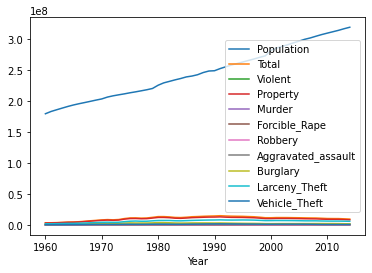

In [1]:
import pandas as pd
df = pd.read_csv("../data/US_Crime_Rates_1960_2014.csv")

df.set_index("Year", inplace=True)
df.plot()

#### 1. Tratar el dataset como una serie temporal a partir de la columna Year. Siempre el eje X será el nuevo índice Year.

In [2]:
df.head()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


### 2. Dibujar todas las columnas numéricas.

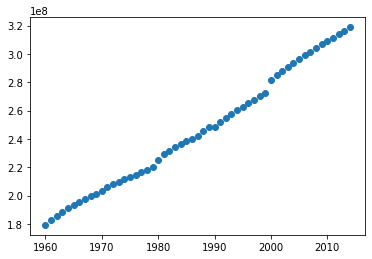

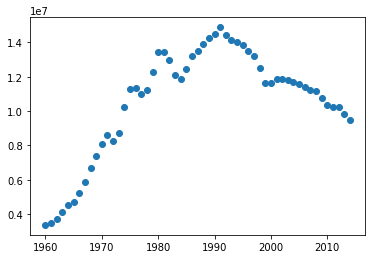

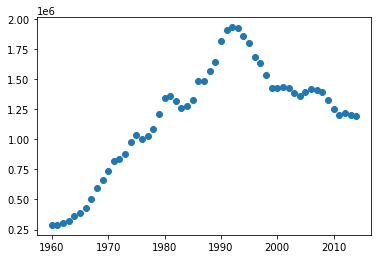

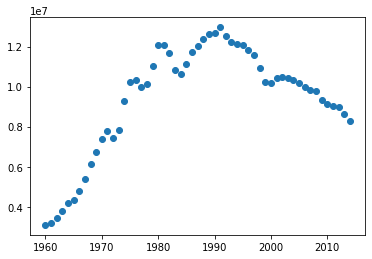

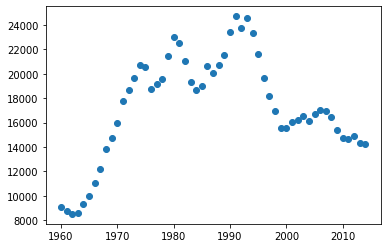

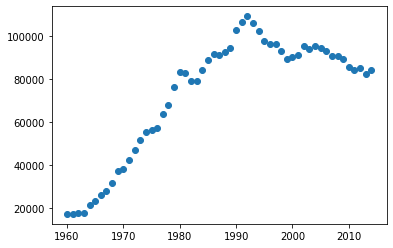

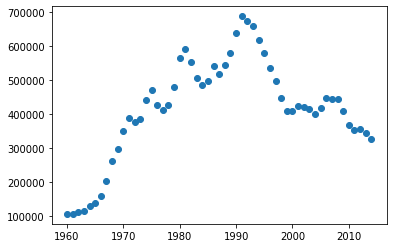

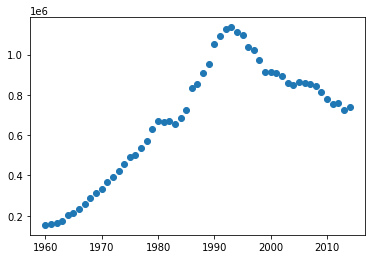

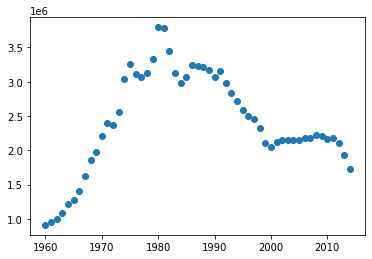

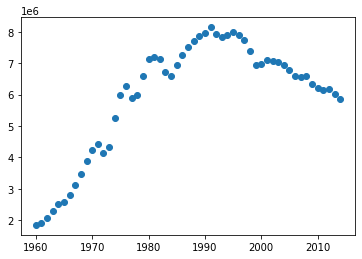

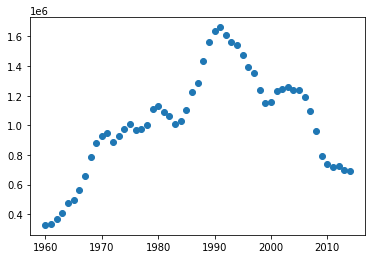

In [6]:
for column in df.columns:
    plt.scatter(x = df.index, y = df[column])
    plt.show()

### 3. Como se puede ver en el punto 2, la columna "Population" tiene una magnitud diferente a la de las demás columnas: Dibuja la misma gráfica que antes pero con dos resoluciones diferentes para que se puedan observar con mejor detalle todas las columnas.

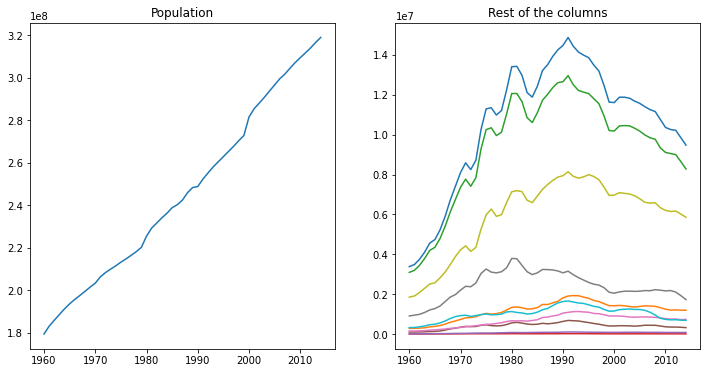

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))

ax1.plot(df.index, df.Population)
ax1.set_title("Population")

for column in df.drop("Population", axis = 1).columns:
    ax2.plot(df.index, df[column])
    ax2.set_title("Rest of the columns")

### 4. A partir de ahora y para el resto del ejercicio, borra las columnas "Population" y "Total" ¿Qué columnas tienen mejor correlación? 

In [12]:
df = df.drop(["Population", "Total"], axis = 1)

<AxesSubplot:>

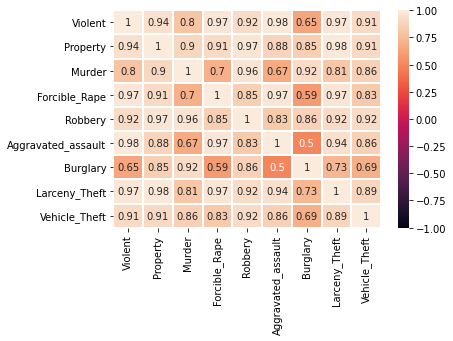

In [17]:
sns.heatmap(df.corr(), annot = True, linewidths = .1, vmin = -1, vmax = 1)

### 5. A partir de las cinco columnas que tengan mejor correlación con la columna "Murder", entrena un modelo de regresión no lineal a partir de polinomio de grado 6. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento.

Trainig scores: [0.999999999999991, 0.9999999999999842, 0.9999999999999976, 0.9999999999999918, 0.9999999998640858, 0.9999999999999597, 0.9999999999999912, 0.9999999999999319, 0.9999999999999991, 0.9999999999999881]

Validation scores: [-1317.553819548406, -183162.02472538166, -70.96257786479113, -148124.3516264194, -1544.210069746278, -117330.04192954204, -1950189.9551184298, -12867.348710430198, -2.090799100938094, -419037.8302392901]


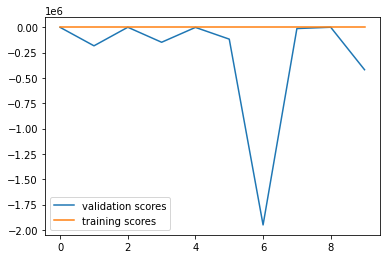

In [56]:
# Independent variables
X = df[["Property", "Robbery", "Burglary", "Larceny_Theft", "Vehicle_Theft"]]

# Dependent variable
y = df["Murder"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

# Transformation
pol_model = PolynomialFeatures(6)

# Model
lin_model = LinearRegression(n_jobs = -1)

# Cross validation
kfold = RepeatedKFold(n_splits = 10, n_repeats = 1, random_state = 42)

# To save scores
val_scores = []
train_scores = []

for ind, (train, val) in enumerate(kfold.split(X_train)):
    #print("Iteración", ind + 1)
    #print("Batch size", len(train))
    #print("Validation size:", len(val))

    # Transformation
    X_poly_train = pol_model.fit_transform(X_train.values[train], y_train.values[train])
    X_poly_val = pol_model.fit_transform(X_train.values[val], y_train.values[val])

    # Training
    lin_model.fit(X_poly_train, y_train.values[train])
    
    # Scores
    train_score = lin_model.score(X_poly_train, y_train.values[train])
    val_score = lin_model.score(X_poly_val, y_train.values[val])

    train_scores.append(train_score)
    val_scores.append(val_score)

print("Trainig scores:", train_scores)
print("\nValidation scores:", val_scores)

plt.plot(val_scores)
plt.plot(train_scores)
plt.legend(["validation scores", "training scores"])

In [50]:
X_poly

array([[1.00000000e+00, 3.79250000e+06, 1.16470000e+05, ...,
        1.46737789e+35, 2.60740879e+34, 4.63314913e+33],
       [1.00000000e+00, 1.22188000e+07, 6.59870000e+05, ...,
        3.65140931e+38, 7.29777633e+37, 1.45854750e+37],
       [1.00000000e+00, 1.21319000e+07, 6.18950000e+05, ...,
        3.48596857e+38, 6.80975585e+37, 1.33026945e+37],
       ...,
       [1.00000000e+00, 1.23569000e+07, 5.42970000e+05, ...,
        2.50328483e+38, 4.65481883e+37, 8.65556249e+36],
       [1.00000000e+00, 9.05274300e+06, 3.54772000e+05, ...,
        9.97215555e+36, 1.16160281e+36, 1.35308869e+35],
       [1.00000000e+00, 1.09445900e+07, 4.46625000e+05, ...,
        1.28865177e+38, 2.16832731e+37, 3.64849793e+36]])

### 6. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones=23 y n_repeats=7.

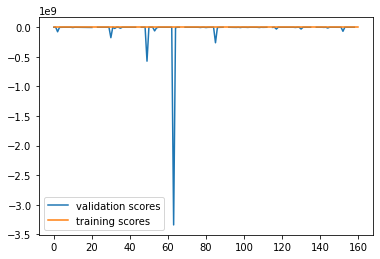

In [57]:
# Lo primero ya lo hice arriba, voy a por lo segundo (con iteraciones y repeats diferentes)

kfold = RepeatedKFold(n_splits = 23, n_repeats = 7, random_state = 42)

# To save scores
val_scores = []
train_scores = []

for ind, (train, val) in enumerate(kfold.split(X_train)):
    #print("Iteración", ind + 1)
    #print("Batch size", len(train))
    #print("Validation size:", len(val))

    # Transformation
    X_poly_train = pol_model.fit_transform(X_train.values[train], y_train.values[train])
    X_poly_val = pol_model.fit_transform(X_train.values[val], y_train.values[val])

    # Training
    lin_model.fit(X_poly_train, y_train.values[train])
    
    # Scores
    train_score = lin_model.score(X_poly_train, y_train.values[train])
    val_score = lin_model.score(X_poly_val, y_train.values[val])

    train_scores.append(train_score)
    val_scores.append(val_score)

plt.plot(val_scores)
plt.plot(train_scores)
plt.legend(["validation scores", "training scores"])